In [1]:
#USING LOGISTIC REGRESSION CLASSIFICATION ALGORITHM

# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

# Importing sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
# setting up my data frame from the CSV file
df = pd.read_csv('nba_rookie_data.csv')

#printing the first 10 rows of the dataframe
df.head(10)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [6]:
#dropping all null values
df.dropna(inplace=True)

In [7]:
#dropping the name column
df.drop('Name', axis=1, inplace=True)

In [8]:
#printing the correlation values 
print(df.corr()['TARGET_5Yrs'].sort_values())

3 Point Percent       -0.003411
3 Point Attempt        0.016151
3 Point Made           0.035025
Free Throw Percent     0.095621
Assists                0.173788
Blocks                 0.211751
Steals                 0.228931
Field Goal Percent     0.235587
Turnovers              0.270767
Defensive Rebounds     0.285673
Field Goal Attempts    0.290684
Offensive Rebounds     0.294637
Free Throw Made        0.295546
Free Throw Attempts    0.296018
Rebounds               0.300491
Points Per Game        0.314632
Minutes Played         0.316031
Field Goals Made       0.316393
Games Played           0.397783
TARGET_5Yrs            1.000000
Name: TARGET_5Yrs, dtype: float64


In [10]:
#printing df.head
df.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [11]:
# setting X and y values from my data frame
X = df.iloc[:, [0]].values
y = df.iloc[:, -1].values

In [12]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 1/3, random_state=0)

In [13]:
# instantiating my model
logre = LogisticRegression()
logre.fit(X_train, y_train)

LogisticRegression()

In [14]:
# printing the accuracy score
print('Our Accuracy is %.2f' % logre.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))

Our Accuracy is 0.67
Number of mislabeled points out of a total 443 points : 148


Text(0.5, 1.0, 'TARGET_5Yrs VS Games Played')

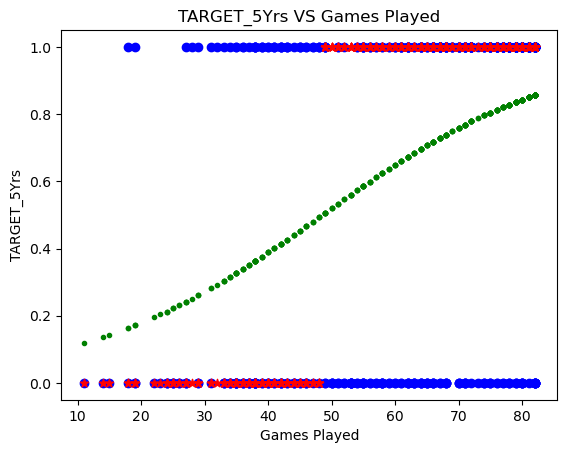

In [15]:
# visualise the model
fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test, color='blue')
ax1.scatter(X_test, logre.predict(X_test), color='red', marker='*')
ax1.scatter(X_test, logre.predict_proba(X_test)[:,1], color='green', marker='.')
ax1.set_xlabel('Games Played')
ax1.set_ylabel('TARGET_5Yrs')
ax1.set_title('TARGET_5Yrs VS Games Played')

In [16]:
#USING GAUSSIAN NAIVES BAYES CLASSIFICATION ALGORITHM

# importing relevant libraries
from sklearn.naive_bayes import GaussianNB

In [17]:
# setting up my data frame from the CSV file
df = pd.read_csv('nba_rookie_data.csv')

#printing dataframe
df.head(10)

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [18]:
#dropping all null values
df.dropna(inplace=True)

In [19]:
#dropping the name column
df.drop('Name', axis=1, inplace=True)

In [20]:
#printing the correlation values 
print(df.corr()['TARGET_5Yrs'].sort_values())

3 Point Percent       -0.003411
3 Point Attempt        0.016151
3 Point Made           0.035025
Free Throw Percent     0.095621
Assists                0.173788
Blocks                 0.211751
Steals                 0.228931
Field Goal Percent     0.235587
Turnovers              0.270767
Defensive Rebounds     0.285673
Field Goal Attempts    0.290684
Offensive Rebounds     0.294637
Free Throw Made        0.295546
Free Throw Attempts    0.296018
Rebounds               0.300491
Points Per Game        0.314632
Minutes Played         0.316031
Field Goals Made       0.316393
Games Played           0.397783
TARGET_5Yrs            1.000000
Name: TARGET_5Yrs, dtype: float64


In [21]:
#printing df.head
df.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [22]:
# setting X and y values from my data frame
X = df.iloc[:, [0]].values
y = df.iloc[:, -1].values

In [23]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 1/3, random_state=0)

In [24]:
# creating the model and fitting our data into the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
# accuracy score
print('Our Accuracy is %.2f' % gnb.score(X_test, y_test))

Our Accuracy is 0.67


In [26]:
# number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))

Number of mislabeled points out of a total 443 points : 148


Text(0.5, 1.0, 'TARGET_5Yrs VS Games Played')

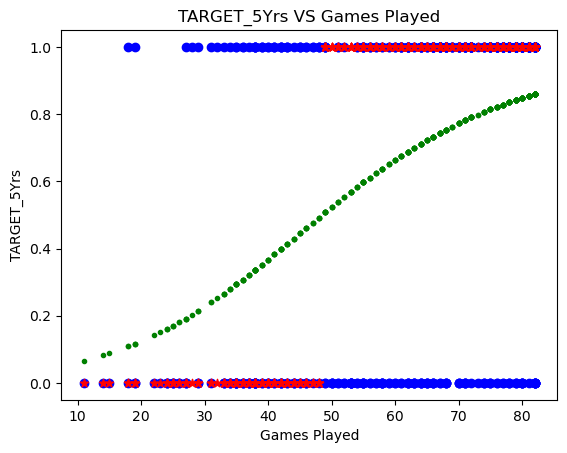

In [27]:
# visualizing the model
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test, color='blue')
ax1.scatter(X_test, y_pred, color='red', marker='*')
ax1.scatter(X_test, y_pred_proba[:,1], color='green', marker='.')
ax1.set_xlabel('Games Played')
ax1.set_ylabel('TARGET_5Yrs')
ax1.set_title('TARGET_5Yrs VS Games Played')

In [28]:
# USING NEURAL NETWORK CLASSIFICATION ALGORITHM (MLPClassifier)
#Importing relevant libraries
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [29]:
# setting up my data frame from the CSV file
df = pd.read_csv('nba_rookie_data.csv')

In [30]:
# dropping all na values
df.dropna(inplace=True)

In [31]:
# dropping the name column 
df.drop('Name', axis=1, inplace=True)

In [32]:
# setting X and y values from my data frame
X = df.iloc[:, [0]].values
y = df.iloc[:, -1].values

In [33]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0, test_size=1/3)

In [34]:
# model architecture
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),
activation="tanh" ,random_state=0, max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 5, 5), max_iter=2000,
              random_state=0)

In [35]:
# performance metrics
print('Our Accuracy is %.2f' % mlp.score(X_test, y_test))

Our Accuracy is 0.67


In [36]:
# number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Number of mislabeled points out of a total 443 points : 148


Text(0.5, 1.0, 'TARGET_5Yrs VS Games Played')

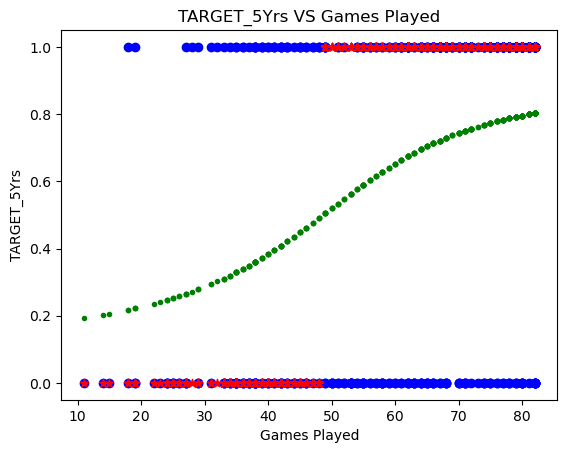

In [37]:
# visualizing the model
y_pred = mlp.predict(X_test)
y_pred_proba = mlp.predict_proba(X_test)

fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test, color='blue')
ax1.scatter(X_test, y_pred, color='red', marker='*')
ax1.scatter(X_test, y_pred_proba[:,1], color='green', marker='.')
ax1.set_xlabel('Games Played')
ax1.set_ylabel('TARGET_5Yrs')
ax1.set_title('TARGET_5Yrs VS Games Played')

In [38]:
# ADDING MULTIPLE FEATURES

#1. IMPORTING LOGISTIC REGRESSION LIBRARY
from sklearn.linear_model import LogisticRegression

# setting up my data frame from the CSV file
df = pd.read_csv('nba_rookie_data.csv')

# dropping all na values
df.dropna(inplace=True)

# dropping the nsame column 
df.drop('Name', axis=1, inplace=True)

# setting X and y values from my data frame
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 1/3, random_state=0)

# model architecture
logre = LogisticRegression(max_iter=2000)
logre.fit(X_train, y_train)

# printing the accuracy score
print('Our Accuracy using Logistic Regression is %.2f' % logre.score(X_test, y_test))

# number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != logre.predict(X_test)).sum()))


#2.IMPORTING GNB ALGORITHM LIBRARY
from sklearn.naive_bayes import GaussianNB

# setting up my data frame from the CSV file
df = pd.read_csv('nba_rookie_data.csv')

# dropping all na values
df.dropna(inplace=True)

# dropping the nsame column 
df.drop('Name', axis=1, inplace=True)

# setting X and y values from my data frame
X = df.iloc[:, [0]].values
y = df.iloc[:, -1].values

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 1/3, random_state=0)

# creating the model and fitting our data into the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Accuracy score
print('Our Accuracy using GaussianNB algorithm is %.2f' % gnb.score(X_test, y_test))

# Number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != gnb.predict(X_test)).sum()))



#3.IMPORTING MLPCLASSIFIER NEURAL NETWORK
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# setting up my data frame from the CSV file
df = pd.read_csv('nba_rookie_data.csv')

# dropping all na values
df.dropna(inplace=True)

# dropping the nsame column 
df.drop('Name', axis=1, inplace=True)

X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

# setting X and y values from my data frame
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0, test_size=1/3)

# model architecture
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5),
activation="tanh" ,random_state=0, max_iter=2000)
mlp.fit(X_train, y_train)

# performance metrics
print('Our Accuracy using Neural Network MLPClassifier is %.2f' % mlp.score(X_test, y_test))

# number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'
% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Our Accuracy using Logistic Regression is 0.71
Number of mislabeled points out of a total 443 points : 127
Our Accuracy using GaussianNB algorithm is 0.67
Number of mislabeled points out of a total 443 points : 148
Our Accuracy using Neural Network MLPClassifier is 0.68
Number of mislabeled points out of a total 443 points : 141


######  REPORT ON THE PREDICTION ANALYSIS OF AN NBA ROOKIE PLAYER'S 5-YEAR SUSTAINABILITY ##################

Algorithm setup
I loaded the relevant Python libraries for constructing my model analysis, and imported my dataset through with panda. Setting our target class as Target_5Yrs from the dataset, I conducted a correlation analysis on all variables to identify the most suitable one for investigation, excluding the initial variable "Name" from the dataset. From my analysis, I was able to select the Games played, being the highest of them all.

Following the model fitting process, the metrics information to assess our different models are presented below: 

Using Logistic Regression, I instantiated my model and run an accuracy evaluation for single feature (Games Played) and multiple (All features)

Using GaussianNB, I instantiated my model and run an accuracy evaluation for single feature (Games Played) and multiple (All features)

Using Neural networks:I was able to setup my neural network model, experimenting with some values for the parameters.

Contrasting Model Performances:
After adding multiple features, a noticeable uptick in accuracy is apparent in the Logistic Regression model at 0.71, distinguishing it from other models, while the Gaussian Naive Bayes model exhibited a decrease. The Neural Network produced a range of values with diverse configurations.

In this study, Logistic Regression emerged as the model with the highest accuracy.